In [107]:
# example of gathering, reading, and plotting data
# For PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [108]:
#importing all needed modules
from __future__ import print_function #for compatibility beteen python2 and python3
import os
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [109]:
#get the data
!curl https://data.cityofnewyork.us/api/views/2v9c-2k7f/rows.csv?accessType=DOWNLOAD > FHVBaseAggregateReport.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6938k    0 6938k    0     0  1219k      0 --:--:--  0:00:05 --:--:-- 1275k


In [110]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/fb1182/PUIdata


In [111]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/fb1182/PUIdata


In [112]:
#move the data
!mv FHVBaseAggregateReport.csv $PUIDATA

In [119]:
#test if the data is there
!ls $PUIDATA

FHVBaseAggregateReport.csv


In [120]:
#read in the data with pandas
fhv = pd.read_csv("%s/FHVBaseAggregateReport.csv"%os.getenv("PUIDATA"))

In [121]:
#print the fist 7 lines out

fhv.head(7)

,Base License Number,Wave Number,Base Name,DBA,Years,Week Number,Pickup Start Date,Pickup End Date,Total Dispatched Trips,Unique Dispatched Vehicle
0,B02738,3,EXPLORER CAR SERVICE INC.,NaN,2016,41,10/02/2016,10/08/2016,205,11
1,B01013,3,AMERICANA TRANSPORTATION LLC,NaN,2017,24,06/11/2017,06/17/2017,319,7
2,B02835,4,DREIST NY LLC,UBER-DREIST NY LLC,2016,6,01/31/2016,02/06/2016,127076,2813
3,B01444,3,REGO PARK EXPRESS INC.,NaN,2015,40,09/27/2015,10/03/2015,874,21
4,B01424,3,EAGLE CAR & LIMO LTD.,NaN,2017,40,10/01/2017,10/07/2017,61,2
5,B02554,3,IMMEDIATE LUXURY CAR & LIMO SERVICE INC.,NaN,2017,19,05/07/2017,05/13/2017,10,8
6,B02881,4,DIANE CAR SERVICE INC.,DIANE CAR AND LIMO SERVICE,2017,50,12/10/2017,12/16/2017,2027,37


In [123]:
#print the last 3 lines out
fhv.tail(3)

,Base License Number,Wave Number,Base Name,DBA,Years,Week Number,Pickup Start Date,Pickup End Date,Total Dispatched Trips,Unique Dispatched Vehicle
92968,B02210,3,"MURRAY CAR SERVICE, INC.",NaN,2015,29,07/12/2015,07/18/2015,107,12
92969,B00449,3,A KINGS HWY C/S INC.,NaN,2017,42,10/15/2017,10/21/2017,478,12
92970,B02878,4,"ELF-NY,LLC","UBER-ELF-NY,LLC",2017,18,04/30/2017,05/06/2017,55881,1062


In [126]:
#look at the columns available
fhv.columns

Index(['Base License Number', 'Wave Number', 'Base Name', 'DBA', 'Years',
       'Week Number', 'Pickup Start Date', 'Pickup End Date',
       'Total Dispatched Trips', 'Unique Dispatched Vehicle'],
      dtype='object')

In [127]:
#count how many rows
fhv.size

929710

In [129]:
#select 2 columns only for plotting
fhv_2c = fhv[['Unique Dispatched Vehicle', 'Total Dispatched Trips']]

In [130]:
fhv_2c.head()

,Unique Dispatched Vehicle,Total Dispatched Trips
0,11,205
1,7,319
2,2813,127076
3,21,874
4,2,61


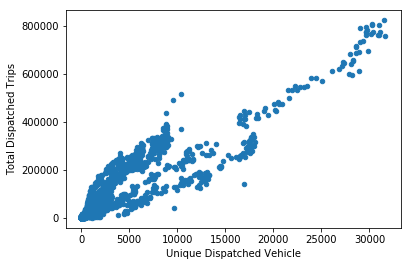

In [135]:
#plot the data
fhv_2c.plot(x="Unique Dispatched Vehicle", y="Total Dispatched Trips", kind='scatter')

Taxi and Limousine commission's monthly report including weekly total dispatched trips and unique dispatched vehicles by base
tabulated from FHV (For-higher vehicle) Trip Record submissions made by bases.
Interestingly, the two variables appear to display a strong correlation.

<h1>Solution using API and a JSON file</h1>

In [136]:
url = "https://data.cityofnewyork.us/resource/edp9-qgv4.json"

In [137]:
#read in a json file using appropriate pandas function
df = pd.read_json(url)

In [138]:
#print first 8 lines
df.head(8)

,base_license_number,base_name,dba,pickup_end_date,pickup_start_date,total_dispatched_trips,unique_dispatched_vehicle,wave_number,week_number,years
0,B00552,HINO-MARU ENTERPRISES INC.,NaN,2016-04-02T00:00:00.000,2016-03-27T00:00:00.000,140,44,3,14,2016
1,B02308,NORWOOD CAR & LIMO INC.,NaN,2015-12-05T00:00:00.000,2015-11-29T00:00:00.000,230,23,3,49,2015
2,B02021,EASYRIDE CAR SERVICE INC.,NaN,2016-12-31T00:00:00.000,2016-12-25T00:00:00.000,310,5,3,53,2016
3,B01197,"TEL-A-CAR OF NEW YORK, LLC",NaN,2016-03-12T00:00:00.000,2016-03-06T00:00:00.000,1456,97,1,11,2016
4,B01146,CHURCH AVE C/S INC,NaN,2017-06-10T00:00:00.000,2017-06-04T00:00:00.000,2812,40,2,23,2017
5,B02155,ABA LUXURY CAR INC.,NaN,2015-12-19T00:00:00.000,2015-12-13T00:00:00.000,167,35,3,51,2015
6,B00556,SURREY CADILLAC LIMO SVC INC,NaN,2016-03-26T00:00:00.000,2016-03-20T00:00:00.000,163,21,3,13,2016
7,B02617,WEITER LLC,UBER-WEITER LLC,2015-08-08T00:00:00.000,2015-08-02T00:00:00.000,63664,1591,1,32,2015


In [139]:
#selecting a date and the two variables
fhv_3c = df[['pickup_start_date', 'unique_dispatched_vehicle', 'total_dispatched_trips']]

For consistency with the data above, let's change the names of the columns (variables) to be the same as before. 

In [140]:
fhv_3c.rename(columns = {'pickup_start_date':'Pickup Start Date', 
               'unique_dispatched_vehicle':'Unique Dispatched Vehicle', 
               'total_dispatched_trips': 'Total Dispatched Trips'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


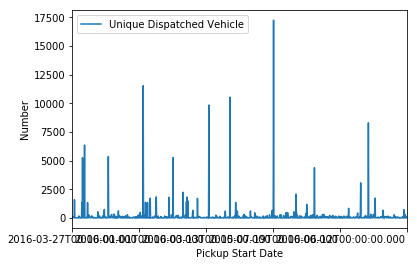

In [141]:
ax = fhv_3c.plot(x='Pickup Start Date', y='Unique Dispatched Vehicle');
ax.set_ylabel("Number");

Let's take care of the formatting of those dates

In [142]:
fhv_3c["Pickup Start Date"] = fhv_3c["Pickup Start Date"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


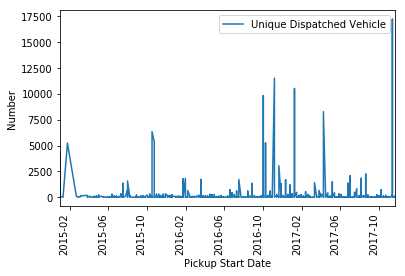

In [145]:
ax = fhv_3c.plot(x='Pickup Start Date', y='Unique Dispatched Vehicle', rot=90)
ax.set_ylabel("Number");

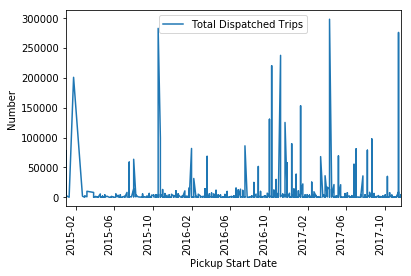

In [146]:
#plot the other columns
ax = fhv_3c.plot(x='Pickup Start Date', y='Total Dispatched Trips', rot=90)
ax.set_ylabel("Number");